# Gemini API: Prompting Quickstart

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/gemini-api-cookbook/blob/main/quickstarts/Prompting.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

This notebook contains examples of how to write and run your first prompts with the Gemini API.

In [ ]:
!pip install -U google-generativeai # Install the Python SDK

In [ ]:
import google.generativeai as genai

## Set up your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see the [Authentication](https://github.com/google-gemini/gemini-api-cookbook/blob/main/quickstarts/Authentication.ipynb) quickstart for an example.

In [ ]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Run your first prompt

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to generate_content, and use the `.text` property to get the text content of the response.

In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content("Give me python code to sort a list")
print(response.text)

```python
my_list = [5, 3, 1, 2, 4]

# Sort the list in ascending order
my_list.sort()

# Print the sorted list
print(my_list)  # Output: [1, 2, 3, 4, 5]

# Sort the list in descending order
my_list.sort(reverse=True)

# Print the sorted list
print(my_list)  # Output: [5, 4, 3, 2, 1]
```


## Use images in your prompt

Here we download an image from a URL and pass that image in our prompt.

First, we download the image and load it with PIL:

In [ ]:
!curl -o image.jpg https://storage.googleapis.com/generativeai-downloads/data/jetpack.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1531k  100 1531k    0     0  3309k      0 --:--:-- --:--:-- --:--:-- 3314k


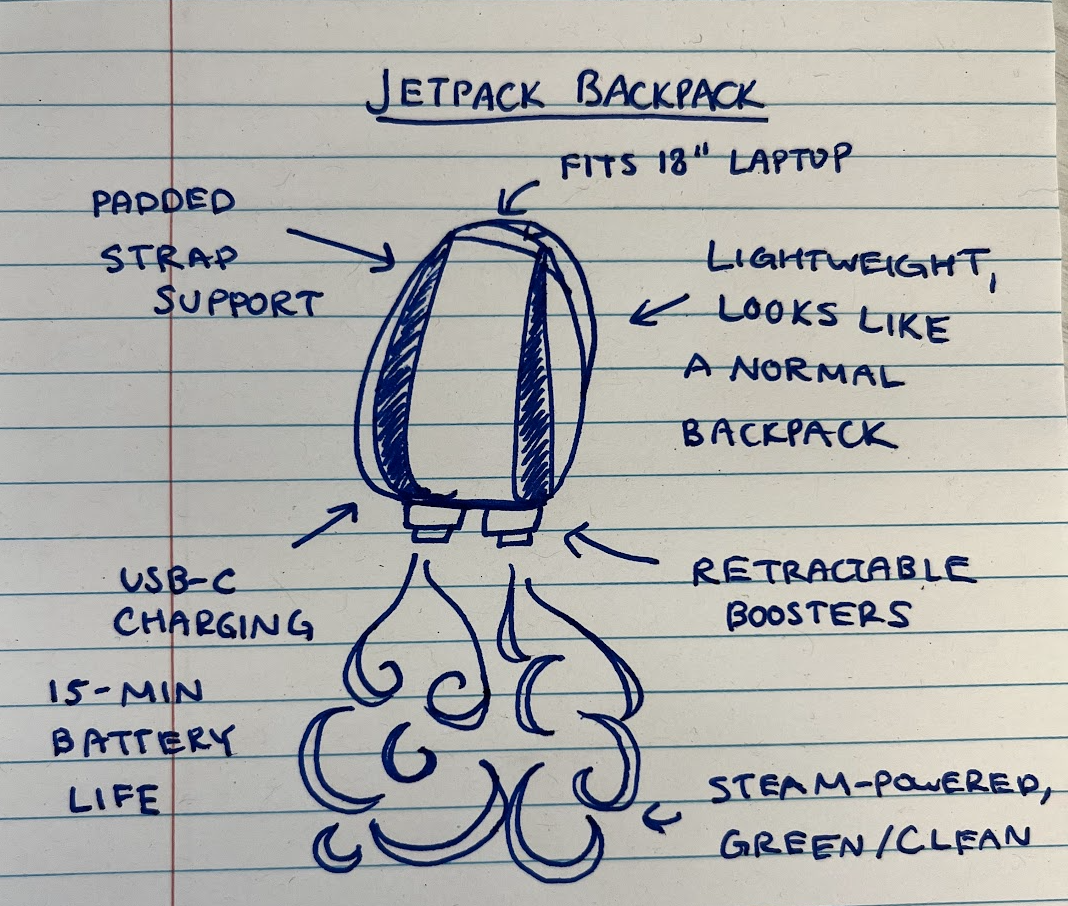

In [ ]:
import PIL.Image
img = PIL.Image.open('image.jpg')
img

In [ ]:
prompt = """This image contains a sketch of a potential product along with some notes.
Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3, etc]}"""

Then we can include the image in our prompt by just passing a list of items to `generate_content`. Note that you will need to use the `gemini-pro-vision` model if your prompt contains images.

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content([prompt, img])
print(response.text)

 {
 "description": "The Jetpack Backpack is a lightweight backpack that looks like a normal backpack but has retractable boosters that can be used to fly. It has a 15-minute battery life and can carry a laptop up to 18 inches. It also has a USB-C charging port and padded shoulder straps.",
 "features": ["Retractable boosters", "15-minute battery life", "USB-C charging port", "Padded shoulder straps", "Fits 18\" laptop", "Lightweight", "Looks like a normal backpack", "Steam-powered", "Green/clean"]
}


## Have a chat

Gemini enables you to have freeform conversations across multiple turns.

The [ChatSession](https://ai.google.dev/api/python/google/generativeai/ChatSession) class will store the conversation history for multi-turn interactions.

In [ ]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])

In [ ]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
print(response.text)

A computer is like a robot that follows your instructions, using its brain to store them and its arms and legs to get the job done.


You can see the chat history:

In [ ]:
print(chat.history)

[parts {
  text: "In one sentence, explain how a computer works to a young child."
}
role: "user"
, parts {
  text: "A computer is like a robot that follows your instructions, using its brain to store them and its arms and legs to get the job done."
}
role: "model"
]


You can keep sending messages to continue the conversation:

In [ ]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?")
print(response.text)

A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components of the computer, and software, which are the programs that run on the hardware. The hardware includes the central processing unit (CPU), which is the "brain" of the computer and controls all of its operations; the memory, which stores data and instructions; and the input and output devices, such as the keyboard, mouse, monitor, and printer. The software includes the operating system, which manages the computer's resources and provides a way for users to interact with the computer; and application software, which performs specific tasks, such as word processing, spreadsheets, and games.

When you give a computer a set of instructions, the CPU fetches the instructions from memory and decodes them. It then executes the instructions, which may involve performing calculations, accessing data from memory, or sending output to a device. The c

## Generation config

Some of these are default values for generation that can be overwritten by passing a `genai.GenerationConfig` to  `GenerativeModel`'s `generation_config` argument:

In [ ]:
model = genai.GenerativeModel(
    'gemini-pro',
    # All settings are optional
    generation_config=genai.GenerationConfig(
        # Candidate count can only be 1 for now.
        candidate_count=1,
        stop_sequences=[],   # No stop sequence set
        max_output_tokens=2000,
        # These last three control how variable the output is.
        temperature=0.9,
        top_p=0.9,
        top_k=200
    ))

You can also pass a `generation_config` to `model.generate_content`. Any values set there overwrite values set on the model constructor.

In [ ]:
response = model.generate_content(
    'Give me a numbered list of cat facts.',
    # Limit to 5 facts.
    generation_config = genai.GenerationConfig(stop_sequences=['\n6'])
)

In [ ]:
print(response.text)

1. Cats have 32 muscles in each of their ears.
2. A cat's nose is unique, just like a human's fingerprint.
3. Cats can jump up to six times their own height.
4. The average lifespan of an indoor cat is 12-15 years, while an outdoor cat's lifespan is only 2-5 years.
5. Cats have five toes on their front paws and four toes on their back paws.


Anywhere you can pass a GenerationConfig, you can also pass an equivalent dict (JSON).

## Learn more

There's lots more to learn!

* For more fun prompts, check out [Market a Jetpack](https://github.com/google-gemini/gemini-api-cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb).
* Check out the [safety quickstart](https://github.com/google-gemini/gemini-api-cookbook/blob/main/quickstarts/Safety.ipynb) next to learn about the Gemini API's configurable safety settings, and what to do if your prompt is blocked.
* For lots more details on using the Python SDK, check out this [detailed quickstart](https://ai.google.dev/tutorials/python_quickstart).